# Clientes al por mayor - Modelos de agrupación

Trabajaremos con el dataset en Kaggle Wholesale customers data para la predicción del comportamiento de un cliente que va a comprar a una tienda por mayoreo.  Se desea pronosticar que tipo de productos son comprados juntos; por ejemplo, un cliente que es dueño de una cafetería y se encuentra en la sección de lacteos comprando leche, es más probable que compre seguido de eso compre en la sección de comestibles en compración de congelados o detergentes. Esto con el proposito de organizar la tienda para aumentar las ventas.

In [1]:
#importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. EDA y PREPROCESAMIENTO
- 1.1 Carga y primer vistazo de los datos
- 1.2 Visualización de los datos
- 1.3 Análisis multivariado
- 1.4 Preprocesamiento (Escalamiento vs Estandarización vs Normalización)

## 1.1  Carga y primer vistazo de los datos

In [2]:
#importamos los datos
df = pd.read_csv("D:\Data_Science\Proyectos\Wholesale\Wholesale customers data.csv")

In [3]:
#primer vistazo al dataset
print(df.shape)
df.head()

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
#Tipos de datos de cada columna y si presenta valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
# Resúmenes estadísticos
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Información obtenida:
- Tenemos un dataset de 440 registros y 8 columnas, sin valores nulos.
- Las columnas de Channel y Region son variables nominales, mientras que el resto son numéricas continuas.
- Las columnas de variable numéricas presentan valores máximos muy alejados del rango intercuantil por lo que es un indicio de outliers.

## 1.2 Visualización de los datos

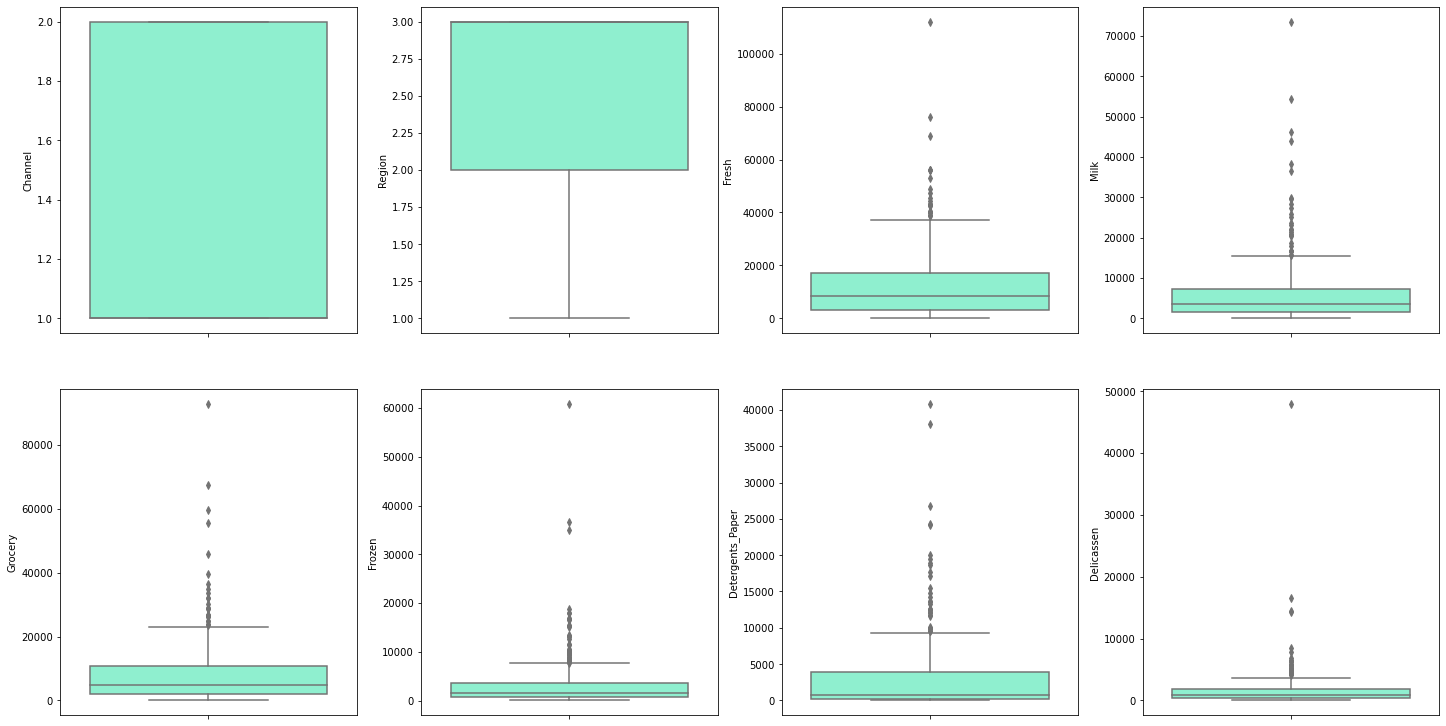

In [6]:
#Gráficas de caja y brazos de las diferentes variables 
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index], color = 'aquamarine')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

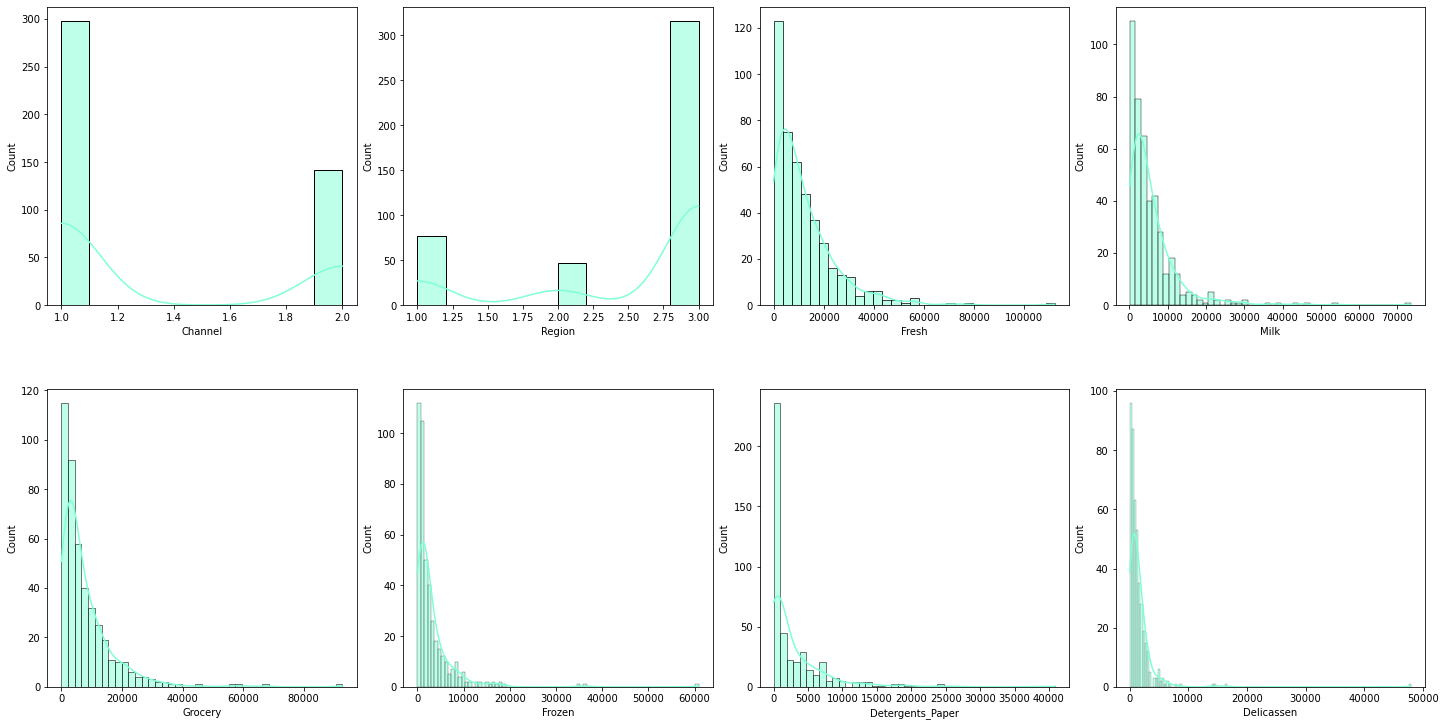

In [7]:
#Gráficas de caja y brazos de las diferentes variables 
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.histplot(x=k, data=df, kde = True, ax=axs[index], color = 'aquamarine')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Información obtenida:
- La mayoría de los datos proviende del canal 1; es decir, gente que compra para negocios como hoteles, restaurantes o cafés.
- Confirmamos que existen bastantes valores fuera del rango intercuantil en las variables numéricas. Sin embargo vamos a quedarnos con dichos outliers ya que pueden ser causados por la gente que compra para abstecer negocios o tiendas minoristas grandes o negocios que necesitan mucho abastecimiento.
- Se visualizan que los datos numéricos siguen una distrubución normal sesgada hacia la derecha generado por las personas que compran para abastecer tiendas minoristas o negocios grandes.

## 1.3 Análisis multivariado

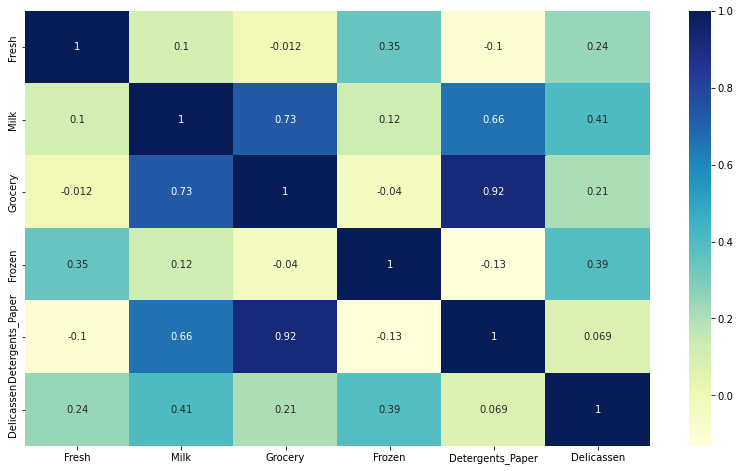

In [8]:
#Matriz de correlación
df = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
fig = plt.figure(figsize = (14,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

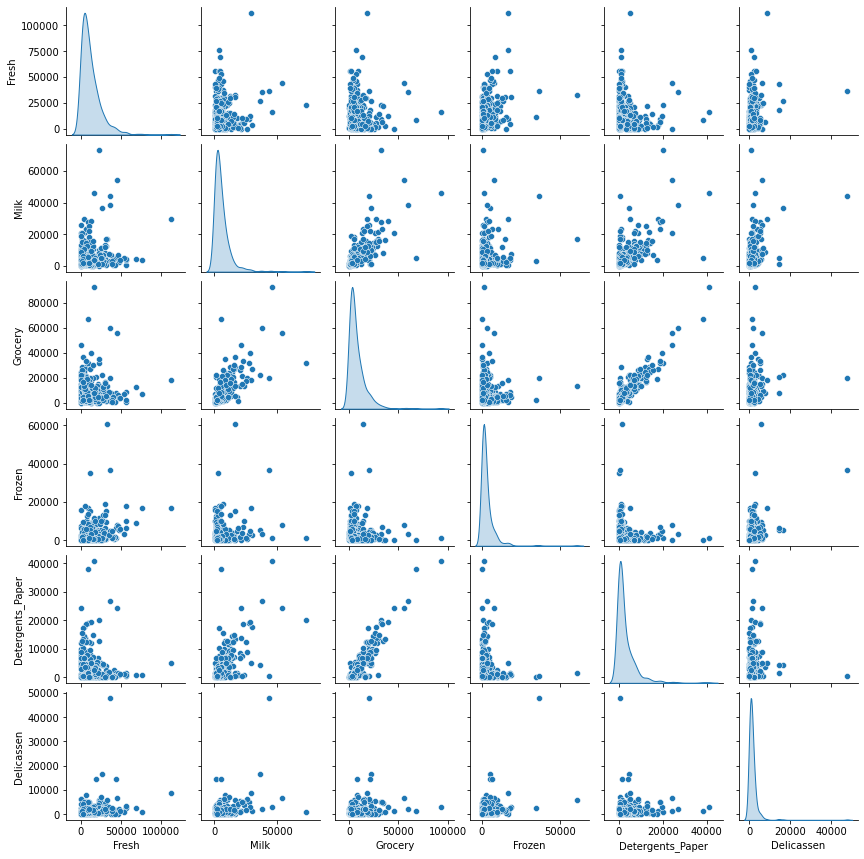

In [9]:
#Gráficas de dispersión
g = sns.pairplot(df, diag_kind = 'kde')
g.fig.set_size_inches(12,12)
plt.show()

Información obtenida:
- De la matriz de correlación encontramos una alta correlación positiva entre Grocery y Detergents_Paper del 0.92 y Milk con Grocery del 0.73, lo que indica que la mayoría de gente que compra De tergentes, papel de baño  o leche, también compra otros productos comestibles. Del resto de categorías no hay correlación lineal.
- En las gráficas de dispersión no visualizamos relaciones aparentes entre dos variables por lo que es en este tipo de problemas donde ocupamos algoritmos de aprendizaje no supervisado para el entendimiento de la data.
- Las gráficas de dispersión tambien nos indican que es necesario estandarizar los datos, ya que hay categorías con valores escalas muy altas que hacen que las gráficas de dispersión se vean muy aplastadas, como el caso de las gráficas donde aparece la variable Delicassen y Frozen.

## 1.4 Preprocesamiento (Escalamiento vs Estandarización vs Normalización) 

Cuando se presentan datos con distintas escalas o magnitudes, es importante transformarlos para que el modelo no le de mayor prioridad o peso a una variable por su escala, ya que muchos modelos se entrenan con promedios, sumas, cálculo de distancias, etc, donde altas magnitudes pueden afectar los resultados.
Existen distintas formas de transformar los datos, a continuación algunas de ellas:

**Escalamiento:**
Es una trasnformación que reescala los valores en un rango entre 0 y 1. Se calculan los máximos y mínimos de la columna y al arreglo que contiene a los datos se le aplica la siguiente transformación:

$$ X_{escalado} = \dfrac{X - min(X)}{max(X) - min(X)}$$

Una desventaja de esta transformación y por la que no la usaremos en este proyecto es que es muy sensible a valores extremos. El ejemplo más claro es con la columna Delicassen, si visualizamos su gráfica de caja y brazos vemos que tiene un valor extremo de casi 50000 mientras que la mayoría de los datos se encuentran por debajo de 5000, por lo que no es conveniente ésta transformación.

**Estandarización:**
Es una transformación que reescala los valores en un rango no específico, pero altera la distribución de los datos de tal forma que el promedio de los datos escalados sea 0 y la varianza sea 1. Esto es muy útil para algoritmos que tienen por hipótesis que los datos se distribuyan de forma normal (como los modelos de regresión lin, multi y polinomial). Se calcula entonces el promedio $\bar{X}$ y la varianza $S$ de la columna y se le aplica la siguiente transformación:

$$ X_{estandarizado} = \dfrac{X - \bar{X}}{S}$$

Cuando hay demasiados valores extremos (como el caso de casi todas las columnas de este dataset), el promedio suele ser muy sensible a estos valores; por lo que se usa la estandarización robusta, que aplica la siguiente transformación:

$$ X_{estandarizado} = \dfrac{X - Rango\;Intercuantil}{S} $$

Ésta transformación igual distribuye los datos de forma normal con varianza cercana a 1 y media cercana 0.

**Normalización:**
Reescala los valores entre -1 y 1, donde cada renglón se considera un vector $X = (X_1,...,X_n)$ y cada columna sus componenetes. Lo que se realiza es dividir cada entrada del vector entre su norma:

$$ X_{normalizado} = \dfrac{X}{||X||^2}$$

Este proceso puede ser util si se planea usar una forma cuadrática como el producto escalar o cualquier otro kernel para cunatificar la similitud de cualquier par de muestras; algo característico en problemas de clasificación de textos y clustering.


In [167]:
#Estandarización de los datos
from sklearn.preprocessing import RobustScaler
data_estandarizada = RobustScaler().fit_transform(df)

In [34]:
#visualizamos como se ve la data sin normalizar
df.values

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

In [168]:
#visualizamos la data normalizada
data_estandarizada

array([[ 0.30168043,  1.06571214,  0.32995207, -0.46657183,  0.50678671,
         0.2638102 ],
       [-0.1048095 ,  1.09293385,  0.56599336,  0.08392603,  0.67567015,
         0.5740085 ],
       [-0.15580183,  0.91581599,  0.34441798,  0.3125889 ,  0.73651183,
         4.87145892],
       ...,
       [ 0.43654933,  2.09660171,  2.99755961, -0.38726885,  3.826342  ,
         0.63845609],
       [ 0.12936404, -0.29095409, -0.29678633, -0.17354196, -0.176932  ,
         0.82117564],
       [-0.41409532, -0.34097839, -0.26409103, -0.51955903, -0.0926267 ,
        -0.64695467]])

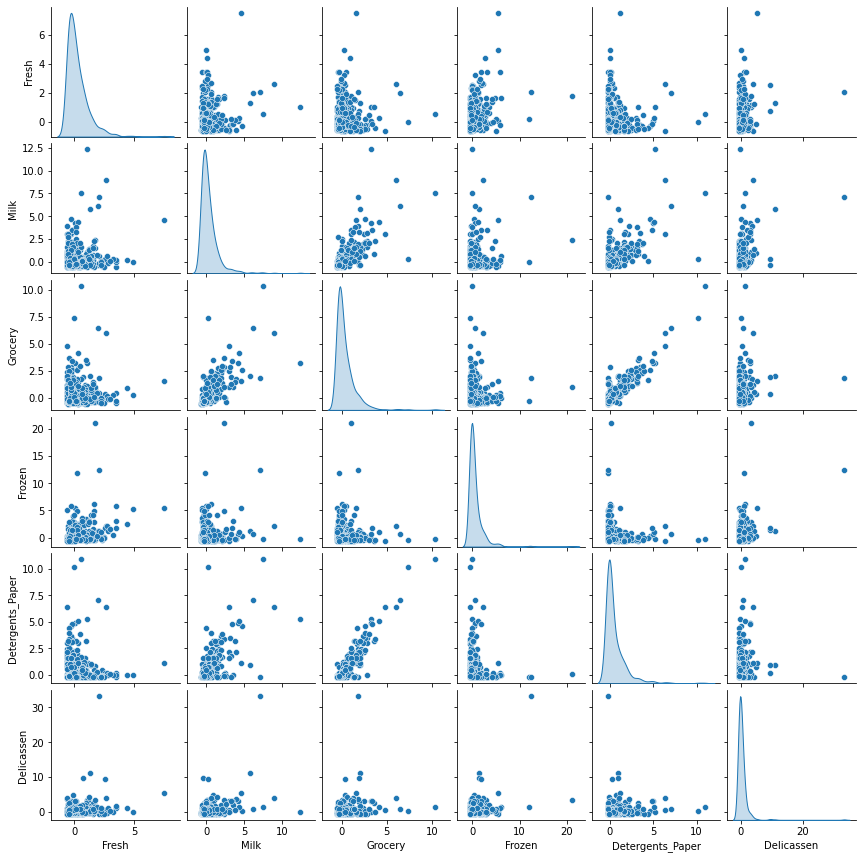

In [169]:
#Gráficas de dispersión de la data estandarizada
df_estandarizada = pd.DataFrame(data = data_estandarizada, columns = df.columns)
g = sns.pairplot(df_estandarizada, diag_kind = 'kde')
g.fig.set_size_inches(12,12)
plt.show()

In [200]:
df_estandarizada.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.253245,0.383449,0.375852,0.549762,0.563398,0.396155
std,0.916075,1.304587,1.117658,1.726413,1.300827,1.997242
min,-0.615747,-0.631402,-0.558937,-0.533784,-0.221949,-0.681657
25%,-0.389414,-0.370145,-0.306077,-0.278716,-0.152718,-0.394653
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.610586,0.629855,0.693923,0.721284,0.847282,0.605347
max,7.507388,12.350700,10.352474,21.103485,10.916172,33.270184


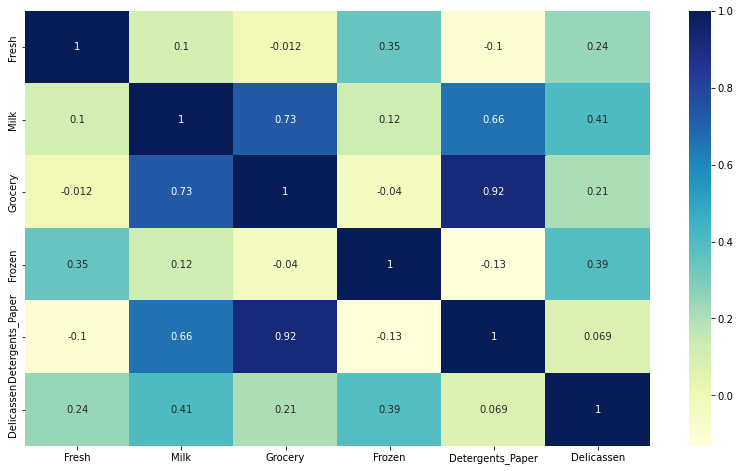

In [171]:
#Matriz de correlación de la data estandarizada
fig = plt.figure(figsize = (14,8))
sns.heatmap(df_estandarizada.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

Información obtenida:
- Se optará por la estandarización robusta para disminuir el peso que puedan tener los outliers al momento de entrenar los algoritmos, además de que los promedios y desviaciones estandar rondan alrededor de 0 y 1 respectivamente, por lo que no estamos muy lejos de las hipótesis para realizar análisis de componentes principales (PCA).
- La estandarización no afectan demasiado las relaciones entre las variables como lo vemos en las gráficas de dispersión y en la matriz de correlación; en esta última solo se presentan ligeras variaciones en sus correlaciones tienendo pequeños incrementos o decesos, pero no tan alejados de las correlaciones originales.

# 2. Modelos de Machine Learning (Agrupamiento)

Utilizaremos diferentes algoritmos de agrupamiento (clustering) para la mejor comprensión de los datos y poder inferir los productos que son comprados juntos. Los algoritmos que utilizaremos son:
- 2.1 K-Means
- 2.2 Agrupamiento Jerárquico
- 2.3 DBSCAN

## 2.1 K-Means

Técnica que permite dividir los datos en diferentes grupos, donde los registros de cada grupo son similares. Estos grupos (clusters) tienen centroides, que son puntos en el espacio que representan. Un punto pertenece a cluster si la distancia entre este y su centroide es la más pequeña en comparación con los otros centroides.
El algoritmo de K-Means consiste en lo siguiente:
1. Dado un número K, se generan K centroides (ya sea de forma aleatoria o proporcionados por el programador).
2. Se clasifican los datos de acuerdo al centroide más cercano que tengan.
3. Se calcula el centro de masa de los datos de cada cluster y ese centro se convierte en el nuevo centroide, a partir de este se repiten los pasos 2 y 3.

Este procedimiento conforma una iteración y al momento de crear el algoritmo se definen cuanta iteraciones se desea realizar. Este algoritmo normalmente converge muy rápido como se muestra en la siguiente figura:

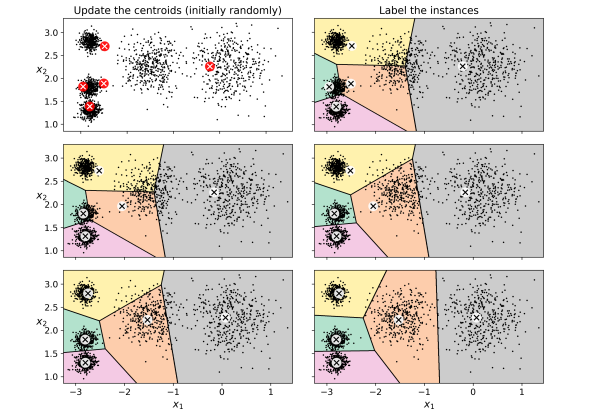
Imagen tomada de: Aurélien Géron. "Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow". (2019). O’Reilly Media, Inc. Pag. 243

Es recomendable parar cuando los centroides de los clústeres ya no cambian, los puntos permanecen en el mismo grupo o si se alcanza el máximo de iteraciones definido.

Lo más importante de este algoritmo es la K proporcionada por el programador, para encontrar la mejor K hay que probar el algoritmo con distintos valores y compararlos a través de una métrica conocida como **Inercia**,  que es el promedio del cuadrado de la distancia entre un punto y su centroide más cercano. Si la Inercia es pequeña, significa que los puntos están más cercas de sus respectivos centroides y por lo tanto, la data está mejor agrupada. Sim embargo, a medida de que aumenta K, siempre va a disminuir la Inercia y un número K tan alto no siempre es mejor. Se utiliza entonces el **método del codo** para visualizar la K más pequeña donde a partir de ella, la inercia ya no cambia demasiado. Hay otro método llamado **método de la silueta** donde se utiliza las distancias media intracluster y la distancia media más cercana a otro cluster disntito, que es más caro computacionalmente y no lo utilizaremos de momento para este proyecto.

In [202]:
#Importamos el algoritmo K-Means
from sklearn.cluster import KMeans

#Definimos los datos con los que se va a entrenar el modelo
X = data_estandarizada

#Hallamos el valor óptimo de K con el método del codo
# Se implementa el algoritmo de K-Means para cada valor de K
inercia = []
for i in range(1,20):
    algoritmo = KMeans(n_clusters = i,           # número K
                      init = 'k-means++',        # centroides de inicio, por default es 'k-means++' y son los mejores centroides
                      max_iter = 300,            # máximo número de iteraciones
                      n_init = 10)               # número de inicios para encontrar los escoger el que tenga los mejores centroides
    algoritmo.fit(X)
    inercia.append(algoritmo.inertia_)

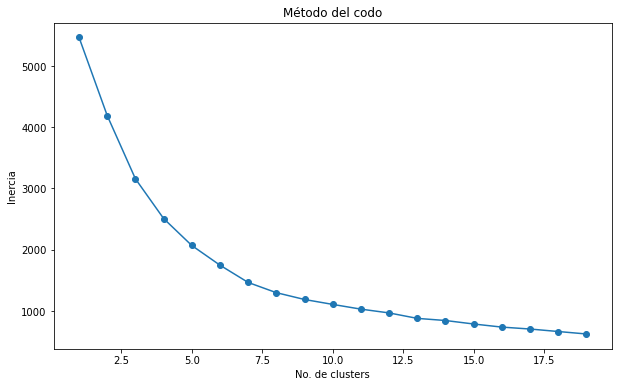

In [203]:
# Graficamos la curva del método del codo
plt.figure(figsize = [10,6])
plt.plot(range(1,20), inercia, marker = 'o')
plt.title('Método del codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.show()

In [204]:
#Visualizamos que el codo oscila entre 5 y 7.5 Cluster, por lo que escogemos K = 6
algoritmo = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)               
algoritmo.fit(X)

#Se obtiene los datos de los centroides y etiquetas de cada cluster
centroides, etiquetas = algoritmo.cluster_centers_,  algoritmo.labels_

In [205]:
#Tenemos 6 centroides, son vectores en R^6 porque hay 6 características
centroides

array([[ 1.56311024e+00,  4.52864319e-01,  2.34661335e-01,
         4.58598862e+00,  3.29854717e-02,  1.83425401e+00],
       [ 6.08944728e-01,  5.52165162e+00,  4.86556488e+00,
         6.11470322e-01,  6.05459134e+00,  2.27469096e+00],
       [-2.01958924e-01,  1.21115852e+00,  1.34840529e+00,
        -5.57051412e-02,  1.72393508e+00,  5.13998092e-01],
       [ 2.51916799e-01, -1.04759380e-01, -9.71422971e-02,
         3.01997392e-01,  3.83893777e-02,  3.53895184e-02],
       [ 2.05294799e+00,  7.12766804e+00,  1.81288407e+00,
         1.24495021e+01, -1.57560876e-01,  3.32701841e+01]])

In [206]:
#inercia 
algoritmo.inertia_

2069.0751992627975

In [207]:
#etiquetas del 0 al 5 de los 440 registros en orden
etiquetas

array([3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3,
       0, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 0, 0, 3, 2, 2,
       2, 2, 2, 1, 2, 2, 3, 3, 3, 2, 3, 3, 1, 2, 3, 3, 3, 1, 3, 2, 3, 1,
       3, 2, 3, 3, 0, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 1, 1, 0,
       3, 3, 3, 3, 1, 0, 2, 3, 3, 3, 3, 3, 2, 2, 3, 0, 3, 3, 2, 2, 3, 2,
       3, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 0, 2, 4, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 0, 2,
       3, 3, 2, 2, 0, 3, 3, 2, 3, 3, 3, 2, 3, 1, 3, 3, 2, 2, 2, 3, 2, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       2, 0, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3,

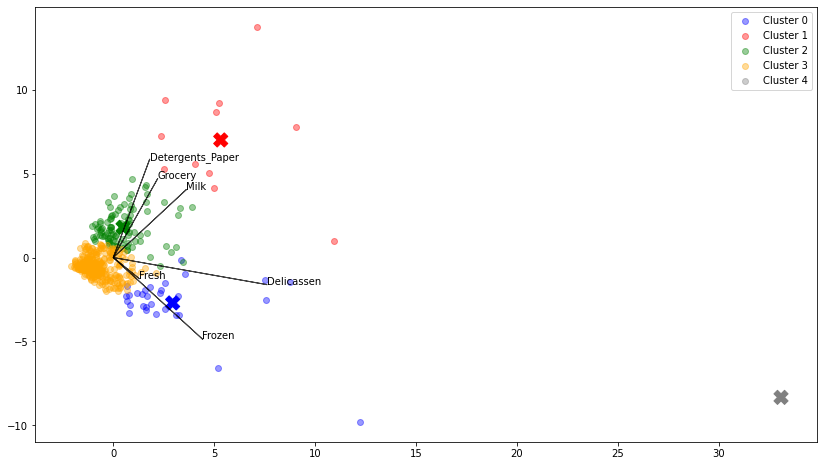

In [209]:
# Aplicamos reducción de dimencionalidad para la mejor visualización
from sklearn.decomposition import PCA

modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X)

#Se aplica la reducción de dimensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

#Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange', 'gray']

#Se grafica los puntos que representan a los registros después de aplicar la reducción de dimensión
plt.figure(figsize=(14,8))
for i in range(5):
    puntos_cluster = []
    for j in range(len(etiquetas)):
        if i == etiquetas[j]:
            puntos_cluster.append(pca[j,:])
    puntos_cluster = np.array(puntos_cluster)
    plt.scatter(puntos_cluster[:, 0], puntos_cluster[:,1], c = colores[i], marker = 'o', alpha = 0.4, label = f'Cluster {i}')


#Se grafican los centroides
plt.scatter(centroides_pca[:,0], centroides_pca[:,1], marker = 'X', c = colores, s = 200)

#Se definen arreglos que contienen las componentes de los ejes principales (contienen la información de las categorías)
xvector = modelo_pca.components_[0]*10
yvector = modelo_pca.components_[1]*10 

#Se grafican los vectores que representan las categorías
columnas = df.columns
for i in range(len(columnas)):
    plt.arrow(0,0,xvector[i],yvector[i],color = 'black', width = 0.0005, head_width = 0.02, alpha = 0.75)
    plt.text(xvector[i],yvector[i], list(columnas)[i], color = 'black')

plt.legend()
plt.show()

Información obtenida:
- Como se trata de un problema de 6 categorías, el espacio de características es de 6 dimensiones. Sin embargo, con ayuda de la técnica de Análisis de Componentes Principales (PCA), se pudo reducir la dimensionalidad, teniendo una representación 2-dimensional de este espacio de características.
- El PCA se caracteriza por no perder tanta información en el proceso (ya que proyecta los puntos en el espacio 6-Dimensional en un plano 2-D conformado por 2 vectores que maximizan la varianza y por lo tanto conservan la mayor cantidad de información posible). Una prueba de ello es que se logra distinguir los 5 clusteres en distintos colores en este espacio 2-Dimensional y sus puntos, al estar lo suficientemente cerca, significa que son de características similares.
- Las flechas negras representan los pesos que tienen cada categoria en las proyecciones sobre los 2 ejes principales que se obtienen del PCA. A medida de que un punto está más cerca del eje que forman estas flechas, significa que es un cliente que está más asociado con ese producto y a medida de que esté más lejos del origen de las flechas, significa que gastó más.
- Con lo mencionado anteriormente podemos identificar poblaciones como el Cluster 2 (verde) que tienden a comprar productos como Milk, Grocery y Dergents_Paper a la vez pudiendo representar negocios pequeños; o el CLuster 1 (rojo) que compra los mismos productos que el CLuster 2 pero en mayor cantidad; este puede representar negocios grandes. Sucede algo similar con el Cluster 3 (amarillo) y el Cluster 0 (azul) que se concentran más en comprar productos frescos y congelados en menor y mayor medida. Otro que se destaca es el Cluster 4 (gris) ya que compra productos Delicassen en alta cantidad y es por eso que está tan alejado del resto.

## 2.2 Agrupamiento Jerárquico

Algoritmo de agrupación donde se basa en una jerarquía de agrupaciones, generando una estructura similar a la de un árbol, la cual se le conoce como dendrograma. Existen dos enfoques, la agrupación jerarquica **Aglomerativa**, que consiste en que cada punto se considera como un solo cluster y se fusiona o aglomera con otro cluster de acuerdo a sus similitudes, este proceseso se repite varias veces hasta formar un solo cluster que engloba toda la data. El segundo enfoque es la agrupación jerarquica **Divisora**, que empieza con un solo Cluster que engloba toda la data y se va dividiendo en clusteres más pequeños dependiendo de su similutd; éste enfoque casi no se usa por lo que nos enfocaremos en la Aglomerativa.

El algoritmo de la agrupación jerarquica algometativa sigue el siguiente algoritmo:
1. Se crea un conjunto inical de clusteres donde cada uno consiste en un solo registro.
2. Se calcula la distancia entre todos los pares de clusters (de acuerdo a las medidas de vinculación y distancia)
3. Se fusionan los dos clusteres que son más cercanos (similares).
4. Si tenemos más de un solo cluster sobrante se repiten los pasos 2 y 3.

En el paso 2 se mencionaron medidas de distancias y vinculación. Las principales medidas de distancia son las siguientes:
- *Distancia euclidiana:* La distancia típica entre dos puntos del espacio dado por $d(x,y) = \sqrt{\sum_{i = 1}^n (x_i -y_i)^2}$ 
- *Distancia Manhattan:* Basada en la suma de los valores absolutos de cada componente; es decir: $d(x,y) = \sqrt{\sum_{i = 1}^n |x_i -y_i|}$ 

A partir de éstas médidas de distancia, se calculan las medidas de vinculación (o linkage method). Consideremos dos clusteres con registros $A = (a_1,...,a_n)$ y $B = (b_1,...,b_m)$ con una medida de vinculación $D(A,B)$, si la distancia $D(A,B)$ es más pequeña que el resto de clusteres, entonces A y B se fusionan. Algunas medidas de vinculación:
- *Vinculación completa:* Calcula la distancia máxima entre todos los pares de registros de  A y B: $$D(A,B)= max\;d(a_i,d_j)\;para\;todo\;par\;(i,j)$$

- *Vinculación simple:*  Calcula la distancia mínima entre todos los pares de registros de  A y B: $$D(A,B)= min\;d(a_i,d_j)\;para\;todo\;par\;(i,j)$$ Ésta medida es buena para detectar valores extremos ya que al ser los más alejados, son los que se agruparan hasta el final.

- *Vinculación promedio:* Se calcula la distancia media entre todos los pares de registros de A y B.

- *Vinculación por centroide:* Se calcula en centroide de cada cluster y se calcula la distancia entre ellos.

- *Vinculación ward:* También llamado método de mínima varianza, es similar a lo que hace K-Means, ya que primero une los clusteres A y B, luego calcula el centroide de esa union y después la distancias intracluster (la suma de los cuadrados de las distancias de cada punto con respecto al centroide). El algoritmo fusiona aquellos clusters A, B con la distancia intracluster más pequeña.

La elección del método de vinculación depende del programador, ya que no hay un método general que siempre de buenos resultados. Diferentes métodos generan diferentes clusters.

Los resultados de una Agrupación Jerarquica se representan con un **dendograma** y sirve para tomar la decisión del número de clusteres que mejor separan a los datos ya que la altura de las ramas verticales representa la similitud que existen entre los individuos de ese cluster, mientras más larga más similitud habrá. Si se traza una linea horizontal a cierta altura y el número de clusteres es el número de líneas verticales cortadas por la linea horizontal.

La desventajas es que es computacionalmente costoso, por lo que no se recomienda usar grandes conjuntos de datos. Además de que se debe definir el número de clusteres K como en el caso de K-Means

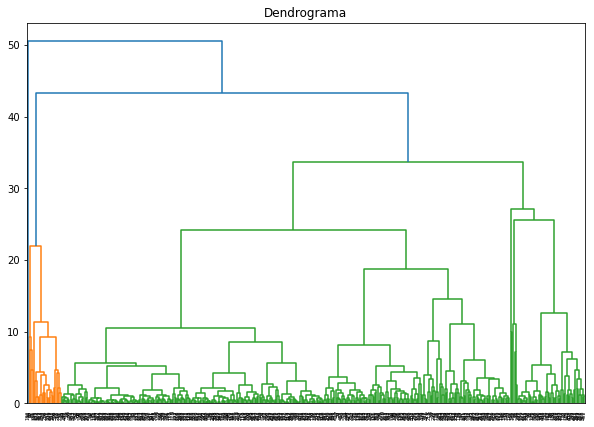

In [210]:
#Importamos paqueteria para crear el dendograma
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title('Dendrograma')
dendrograma = shc.dendrogram(shc.linkage(X,method = 'ward')) #escogemos la vinculación Ward

In [217]:
#Importamos el algoritmo K-Means
from sklearn.cluster import AgglomerativeClustering

#Entrenamos el algoritmo
algoritmo = AgglomerativeClustering(n_clusters = 4, 
                                    affinity = 'euclidean', # medida de distancia
                                    linkage = 'ward')       #medida de vinculación
algoritmo.fit(X)

#Se obtiene las etiquetas de cada registro
etiquetas = algoritmo.labels_

In [218]:
etiquetas

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0,
       0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 3, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

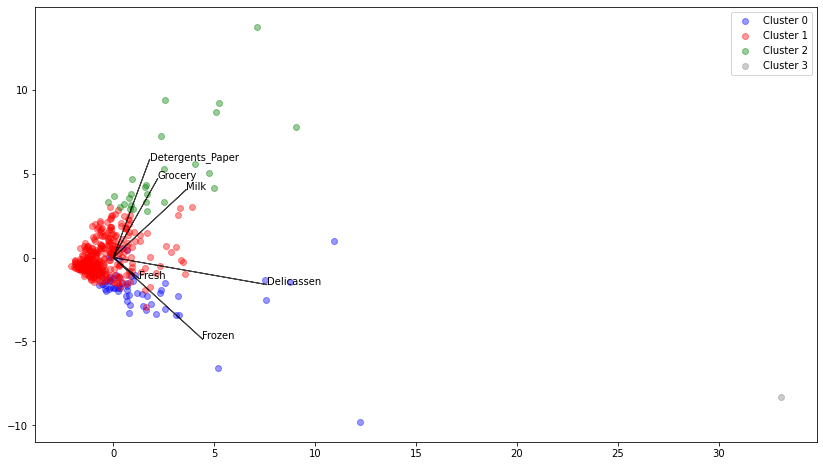

In [221]:
#Ocupamos PCA para la reducción de dimensionalidad y su mejor visualización
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X)

#Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'gray']

#Se grafica los puntos que representan a los registros después de aplicar la reducción de dimensión
plt.figure(figsize=(14,8))
for i in range(4):
    puntos_cluster = []
    for j in range(len(etiquetas)):
        if i == etiquetas[j]:
            puntos_cluster.append(pca[j,:])
    puntos_cluster = np.array(puntos_cluster)
    plt.scatter(puntos_cluster[:, 0], puntos_cluster[:,1], c = colores[i], marker = 'o', alpha = 0.4, label = f'Cluster {i}')

#Se definen arreglos que contienen las componentes de los ejes principales (contienen la información de las categorías)
xvector = modelo_pca.components_[0]*10
yvector = modelo_pca.components_[1]*10

#Se grafican los vectores que representan las categorías
columnas = df.columns
for i in range(len(columnas)):
    plt.arrow(0,0,xvector[i],yvector[i],color = 'black', width = 0.0005, head_width = 0.02, alpha = 0.75)
    plt.text(xvector[i],yvector[i], list(columnas)[i], color = 'black')
    
plt.legend()
plt.show()

Información obtenida:
- De acuerdo al dendograma la mejor opción fue quedarnos con solo 4 clusters ya que contenían a la línea vertical más grande y por lo tanto con mayor similitud entre los datos. Vemos que este algoritmo te brinda una mejor perspectiva de como se realizó la agrupación y posiblemente una mejor separación entre clusteres ya que se basa en un orden jerarquico.
- Podemos identificar el Cluster 1 (rojo) que se concentra en comprar los 6 tipos de producto pero en menor cantidad, puede representar tiendas minoristas o negocios pequeños. De ahí los separa en el Cluster 2 (verde) que se enfocaen comprar Detergents, Grocery y Milk en mayor cantidad por lo que pueden ser tiendas minoristas más grandes y otras que se enfocan más en comprar Fresh, Frozen y Delicassen en mayor cantidad; pudiendo representar restaurantes. Por último, está el cluster 3 (gris) que compra productos Fresh y Frozen por encima del resto, posiblemente representando a cadenas de restaurante grandes.
- Éste método no proporciona los centroides ni la inercia de forma automática aunque se puede calcular a parte.

## 2.3 DBSCAN

Es un algoritmo de agrupación basado en regiones de alta densidad. La idea clave es que para cada punto de un cluster se define una vecindad de radio $\epsilon$ y un parámetro de puntos mínimos,  necesarios para clasificar los puntos y generar los clusters. A continuación los pasos del algortimo:
1. Comienza con un punto arbitrario y dado los parámetros de epsilon se visualiza el número de vecinos; es decir, los puntos cuya distancia es menor o igual a $\epsilon$.
2. Dado el parámetro de puntos mínimos, se inicia la formación de clusteres o no. En caso de que se alcance la cantidad de puntos mínimos, entonces al punto se le llama **punto de núcleo** y todos sus vecinos perteneceran al mismo cluster. 
3. Luego, para cada vecino del punto de núcleo y se cuenta el número de vecinos dentro de su respectiva vecindad. En caso de alcance los puntos mínimos serán también puntos de núcleo. En caso de que no alcancen los puntos mínimos, serán llamados **puntos de borde**.
4. El proceso continua hasta que ya no se encuentran puntos de núcleo, siendo los puntos de borde los últimos que pertenecen al cluster. 
5. El proceso se reinicia con un nuevo punto que no pertenezca al cluster generado. Si se convierte en un nuevo punto de núcleo generará un nuevo cluster. En caso de que no, se etiquetará como **punto de ruido**.

Para determinar la mejor cantidad de puntos mínimos, y la mejor $\epsilon$ hay que recurrir a la experimentación y al conocimiento de la data. Sin embargo existe un algoritmo en el que, dado una cantidad de puntos mínimos, se calcula la $\epsilon$ más óptima:
1. Define k = el numero de puntos mínimos o vecinos más cercanos
2. Para cada punto del dataset calcula el promedio de la distancia entre sus K vecinos más cercanos (hay paqueterías que vamos a usar que nos ayudan con este calculo)
3. Grafica el numero de puntos sobre el eje X y la distancias promedio sobre el eje Y
4. Obtendremos una gráfica similar al método del codo y escogeremos la altura Y donde se encuentre el umbral de cambio o codo como en el caso de K-Means

Una de las ventajas de este algoritmo es que permite descartar puntos atípicos y separar clusters de alta densidad de datos frente a otros de baja densidad.  Además de que no es necesario especificar el número de clusteres que debe de encontrar.

Algunas desventajas es que para bases de datos con clusteres de densidad variable puede que no sea muy efectivo al momento de agrupar, además de ser muy sensible a los hiperparámetros.

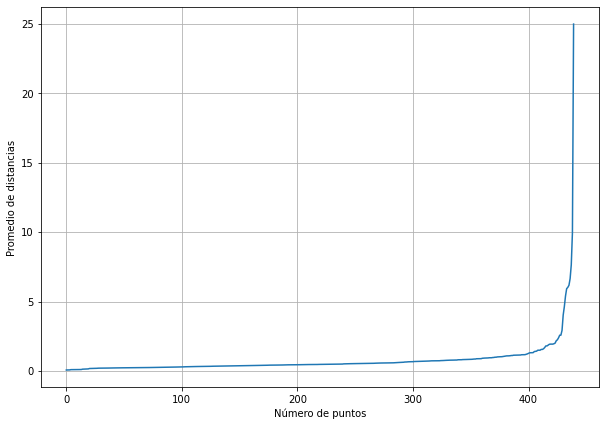

In [225]:
#Buscamos la epsilon más óptima, para ello importamos la librería que nos ayudará con esta tarea
from sklearn.neighbors import NearestNeighbors

#Calculamos el promedio de las distancias
neighbors = NearestNeighbors(n_neighbors = 3, metric = 'euclidean')
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

#Ordenamos los valores de las distancias de forma ascendente
distances = np.sort(distances, axis=0)
distances = distances[:,1]

#Graficamos
plt.figure(figsize=(10,7))
plt.plot(distances)
plt.ylabel('Promedio de distancias')
plt.xlabel('Número de puntos')
plt.grid()
plt.show()

In [229]:
#Importamos el algoritmo
from sklearn.cluster import DBSCAN

#Entrenamos el algoritmo
algoritmo = DBSCAN(eps = 2,               #epsilon
                   min_samples = 3,      #puntos mínimos
                   metric = 'euclidean')  #medida de distancia

algoritmo.fit(X)

#Se obtiene las etiquetas de cada registro
etiquetas = algoritmo.labels_

In [230]:
etiquetas

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0,  2, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [231]:
#Contamos el número de elementos por cada cluster encontrado y el número de valores atípicos -1
import collections

unique, counts = np.unique(etiquetas, return_counts=True)

print(dict(zip(unique, counts)))

{-1: 21, 0: 413, 1: 3, 2: 3}


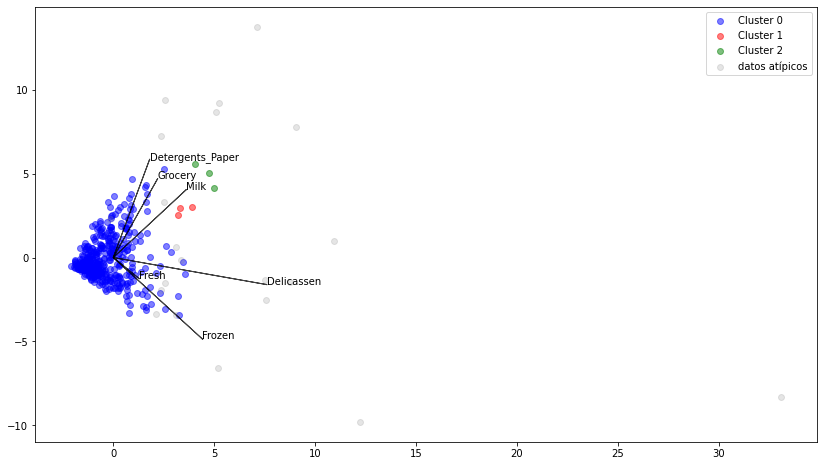

In [233]:
#Ocupamos PCA para la reducción de dimensionalidad y su mejor visualización
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X)

#Se define los colores de cada clúster
colores = ['blue', 'red', 'green']

plt.figure(figsize=(14,8))
#Se grafica los puntos que representan a los registros después de aplicar la reducción de dimensión
for i in range(3):
    puntos_cluster = []
    for j in range(len(etiquetas)):
        if i == etiquetas[j]:
            puntos_cluster.append(pca[j,:])
    puntos_cluster = np.array(puntos_cluster)
    plt.scatter(puntos_cluster[:, 0], puntos_cluster[:,1], c = colores[i], marker = 'o', alpha = 0.5, label = f'Cluster {i}')

#Se grafican los puntos puntos atípicos
puntos_atipicos = []
for j in range(len(etiquetas)):
    if etiquetas[j] == -1:
        puntos_atipicos.append(pca[j,:])
puntos_atipicos = np.array(puntos_atipicos)
plt.scatter(puntos_atipicos[:, 0], puntos_atipicos[:,1], c = 'gray', marker = 'o', alpha = 0.2, label = 'datos atípicos')
    
    
#Se definen arreglos que contienen las componentes de los ejes principales (contienen la información de las categorías)
xvector = modelo_pca.components_[0]*10
yvector = modelo_pca.components_[1]*10 

#Se grafican los vectores que representan las categorías
columnas = df.columns
for i in range(len(columnas)):
    plt.arrow(0,0,xvector[i],yvector[i],color = 'black', width = 0.0005, head_width = 0.02, alpha = 0.75)
    plt.text(xvector[i],yvector[i], list(columnas)[i], color = 'black')
    
plt.legend()
plt.show()

Información obtenida:
-   

Información obtenida:
- A pesar de que se ocupo un método del codo para la busqueda del parámetro $\epsilon$ con distinta cantidad de puntos mínimos, casi todos arrojaban resultados similares o bien, marcaba que la mayoría de los datos eran datos atípicos. Esto nos puede indicar que los datos estaban demasiado aglomerados y densos en un solo cluster que para el algoritmo le era difícil distinguir algún otro, por lo que no funcionó muy bien para estos datos. Aunque se aprecia su capacidad para detectar los datos atípicos (gris) ya que son los datos más alejados del resto de los conjuntos.
- Este algoritmo condensa la población en un solo grupo principal, el Cluster 0 (Azul) como aquellas personas que compran cualquiera de los productos pero en cantidades similares (negocios, restaurantes o tiendas minoristas pequeñas). Y señala a otros dos Clusters 1 (verde) y 2 (rojo), ambos comprando más productos como Milk o Grocery, lo que se puede referir a cafeterías o restaurantes.

# 3. Conclusiones

- Los algoritmos de K-Means y Agrupamiento Jerarquico fueron los que mejores agrupamientos para este dataset, el primero presentando una ventaja en cuanto al tiempo de computo ya que los agrupamientos los hacía en seguida por lo que es un algoritmo ideal para grandes volumenes de datos. El segundo en cambio, brindaba una mejor perspectiva sobre como es que hacía la agrupación a través del dendograma aunque no creo que sea recomendable para grandes volumenes de datos por el alto costo computacional que realiza. Por otro lado, el algoritmo de DBSCAN se debe explorar más a detalle con otro dataset e identificar el potencial que pueda llegar a tener ya que se menciona que es de los algoritmos más utilizados para el clustering.
- Otra cosa importante es el preprocesamiento de los datos que se le brinda a los datos, ya que se intentó realizar estos mismas agrupaciones pero con Normalización y Escalamiento, sin embargo, estas  transformaciones afectaban a la distribución de los datos y las relaciones que había entre sí, por lo que una vez preprocesados los datos es importante visualizarlos nuevamente para evitar este tipo de errores.
- El Análisis de Componentes Principales también ha sido una herramienta fundamental para este análisis, ya que permitió la reducción de dimensionalidad para la mejor visualización de los clusteres y así tener un mejor entendimiento de la data. 
- Estos algoritmos de aprendizaje No supervisado tienen muchas ventajas, sobre todo cuando no se pueden dar etiquetas a los datos por ser demasiado costoso o tardado. Es sabido que se pueden implementar con modelos de aprendizaje supervisado para ayudarlos a encontrar patrones de forma más rápida y tener mejores resultados al momento de la clasificación o regresión. Esto se implementa a través de "Pipelines" las cuales se realizarán en un proyecto a parte para identificar las mejorías que recibe este modelo al juntar estos dos tipos de aprendizaje en sus tareas de predicción.